# Unsupervised Learning: Fund Allocation For Countries in Need

**Problem Statement** :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present.

**Aim** :

- To cluster countries based on numerical features.
- It is an **Unsupervised Learning** problem statement.

<center><b>Dataset Attributes</b></center>

- **country**: Name of the country
- **child_mort**: Death of children under 5 years of age per 1000 live births
- **exports**: Exports of goods and service per capita. Given as %age of the GDP per capita
- **health**: Total health spending per capita. Given as %age of GDP per captia
- **imports**: Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income**: Net income per person
- **Inflation**: The measurement of the annual growth rate of the Total GDP
- **life_expec**: The average number of years a new born child would live if the current mortality patterns are to rem..
- **total_fer**: The number of children that would be born to each woman if the current age-fertility rates remain th..
- **gdpp**: The GDP per capita. Calculated as the Total GDP divided by the total population.

**TOC** :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering
- Modeling
- Conclusion

**What you will learn** :
- Data Visualization techniques.
- Feature Engineering & PCA.
- K-Means Clustering vs DBSCAN Clustering vs Hierarchical Clustering model performance.

## Dataset Information

**Import the Necessary Libraries** :

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.display import set_matplotlib_formats

# Pandas display options
pd.options.display.float_format = '{:.2f}'.format

# Matplotlib configuration
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'serif'

# Improve figure display in IPython
set_matplotlib_formats('retina')

# Ensure inline plotting in Jupyter notebooks
%reload_ext autotime

time: 0 ns (started: 2024-07-18 16:00:49 +09:00)


In [2]:
data = pd.read_csv('Country-data.csv')

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


time: 15 ms (started: 2024-07-18 16:00:49 +09:00)


**Data info** :

In [3]:
data.shape

(167, 10)

time: 0 ns (started: 2024-07-18 16:00:49 +09:00)


In [4]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

time: 0 ns (started: 2024-07-18 16:00:49 +09:00)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
time: 0 ns (started: 2024-07-18 16:00:49 +09:00)


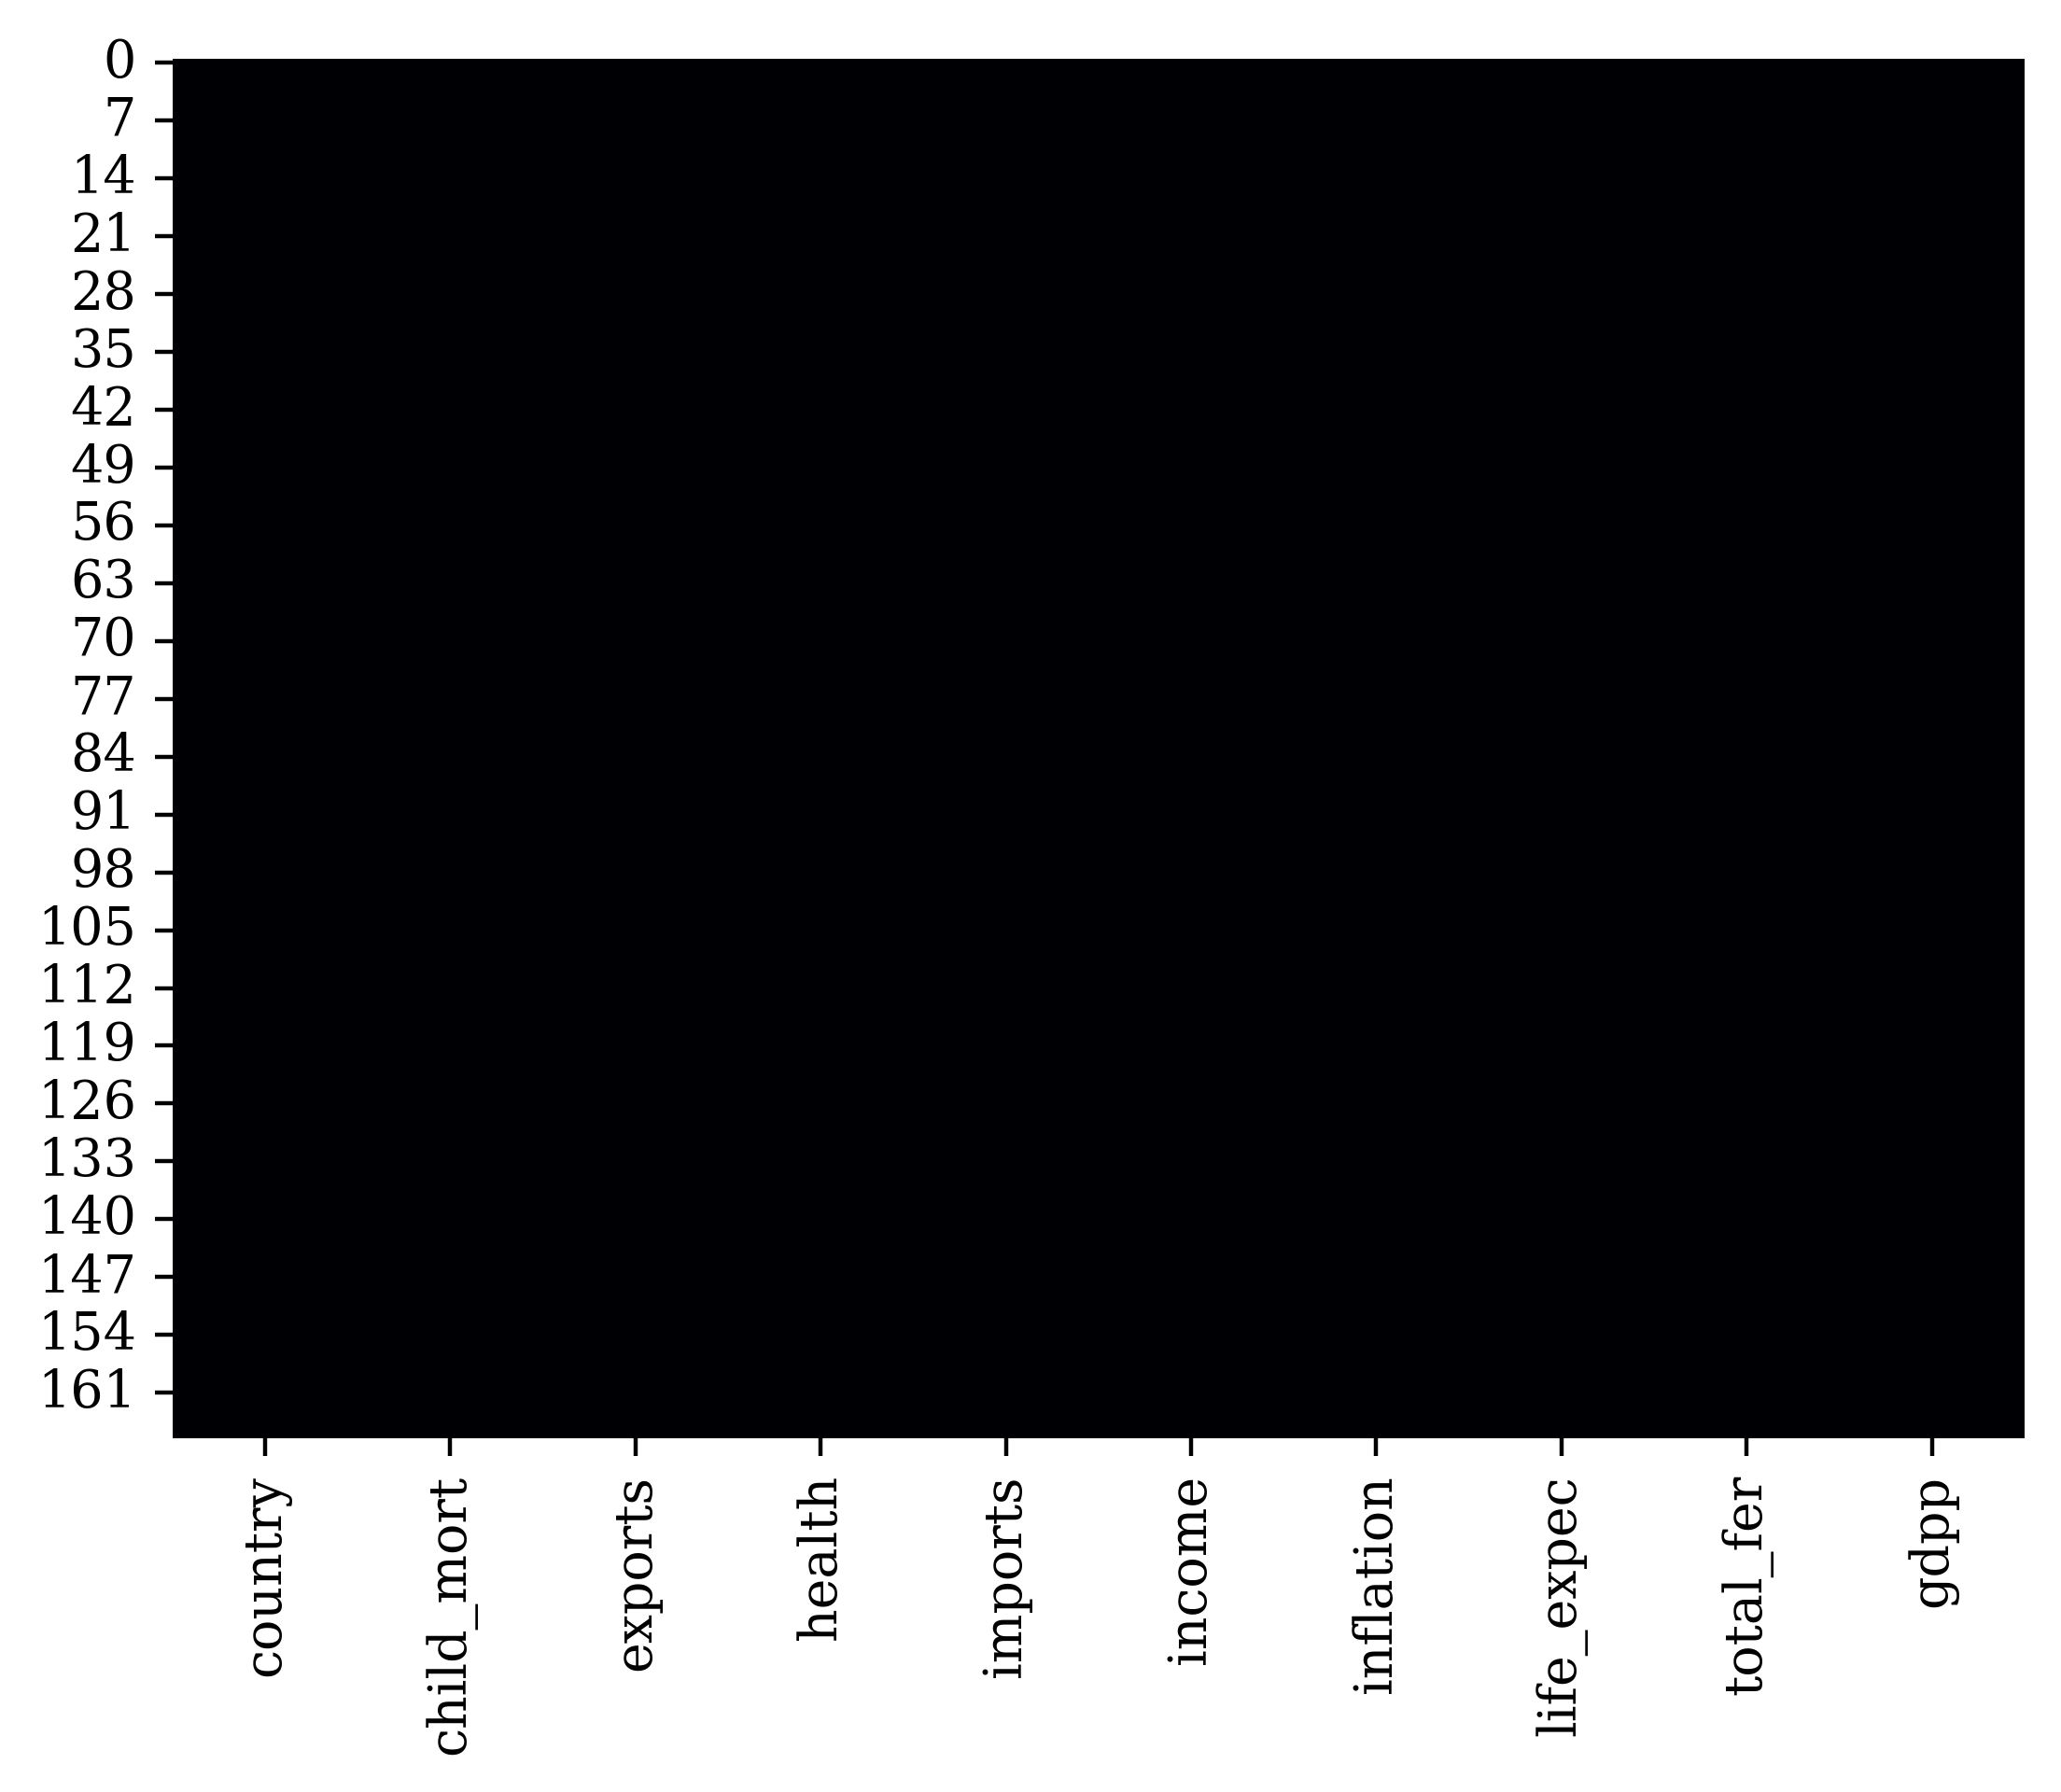

time: 390 ms (started: 2024-07-18 16:00:49 +09:00)


In [6]:
sns.heatmap(data.isnull(), cmap='magma', cbar=False);

**No null values** prresent in the data!

In [7]:
data.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,NaN,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,NaN,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,NaN,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,NaN,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,NaN,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00


time: 15 ms (started: 2024-07-18 16:00:50 +09:00)


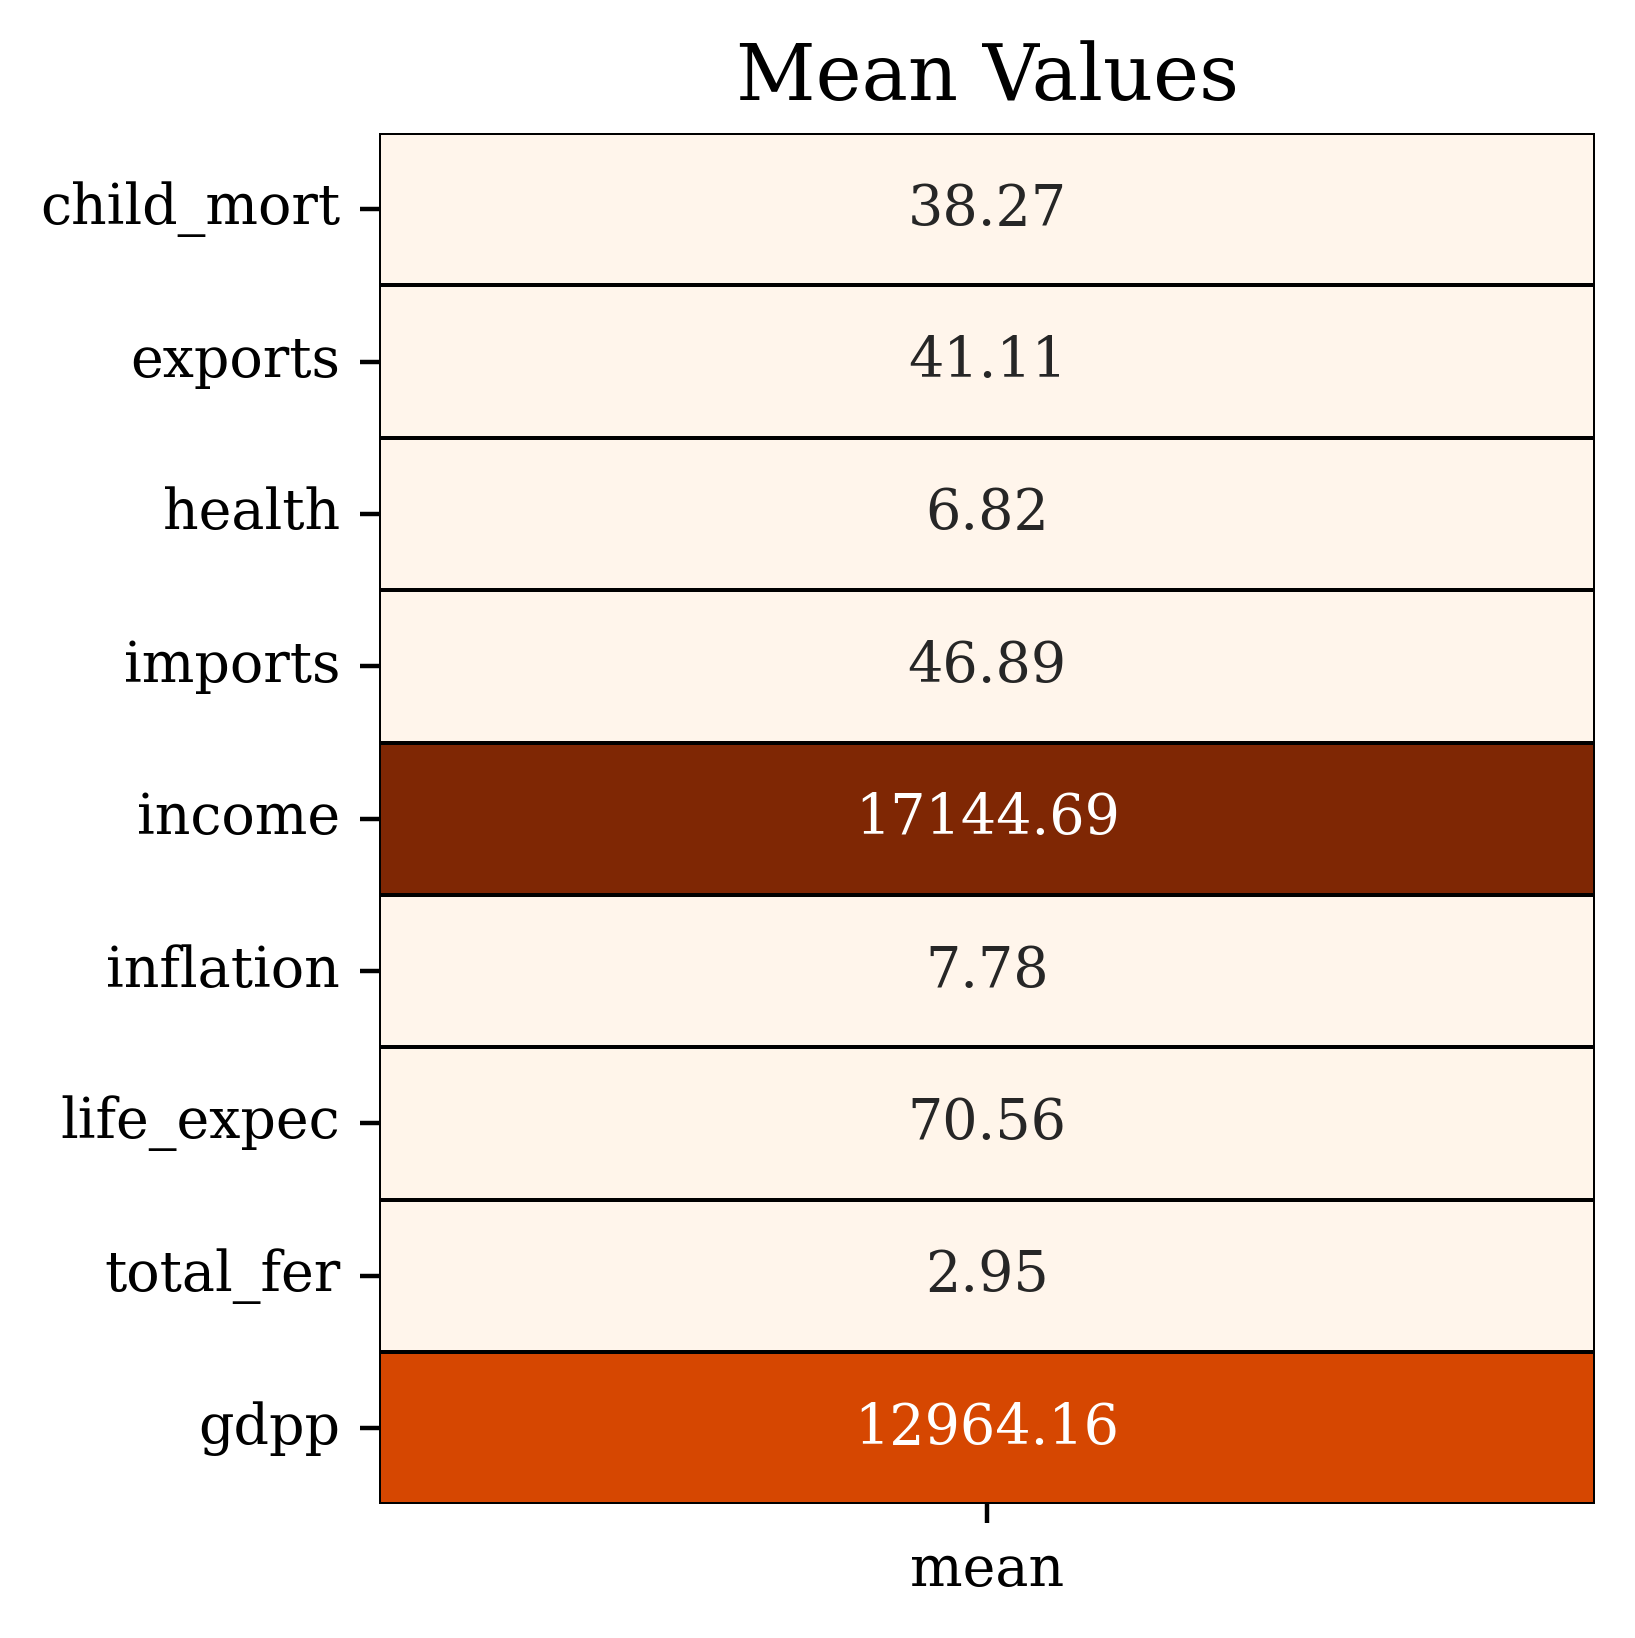

time: 250 ms (started: 2024-07-18 16:00:50 +09:00)


In [8]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the heatmap
sns.heatmap(data.describe().T[['mean']], cmap='Oranges', annot=True, fmt='.2f',
            linecolor='black', linewidths=0.4, cbar=False, ax=ax)

# Set the title
ax.set_title('Mean Values', fontdict={'fontsize': 14, 'font': 'serif'})

# Adjust layout
fig.tight_layout(pad=4)

## Exploratory Data Analysis

In [9]:
categorical_features = [column for column in data.columns if pd.api.types.is_object_dtype(data[column])]
numerical_features = [column for column in data.columns if pd.api.types.is_numeric_dtype(data[column])]

print("Categorical features:", *categorical_features)
print("Numerical features:", *numerical_features)

Categorical features: country
Numerical features: child_mort exports health imports income inflation life_expec total_fer gdpp
time: 0 ns (started: 2024-07-18 16:00:50 +09:00)


- For this dataset, as the number of features are less, we manually check the dataset.
- Clearly, except **country**, all the features are numerical features with their element datatype being either float or integer.
- We use the typical apporach for division of features i.e based on the datatypes of the elements of the respective feature.

**Eg**: datatype = integer, feature = numerical feature ; datatype = string, feature = categorical feature

In [10]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


time: 0 ns (started: 2024-07-18 16:00:50 +09:00)


**Distributon of Features** :

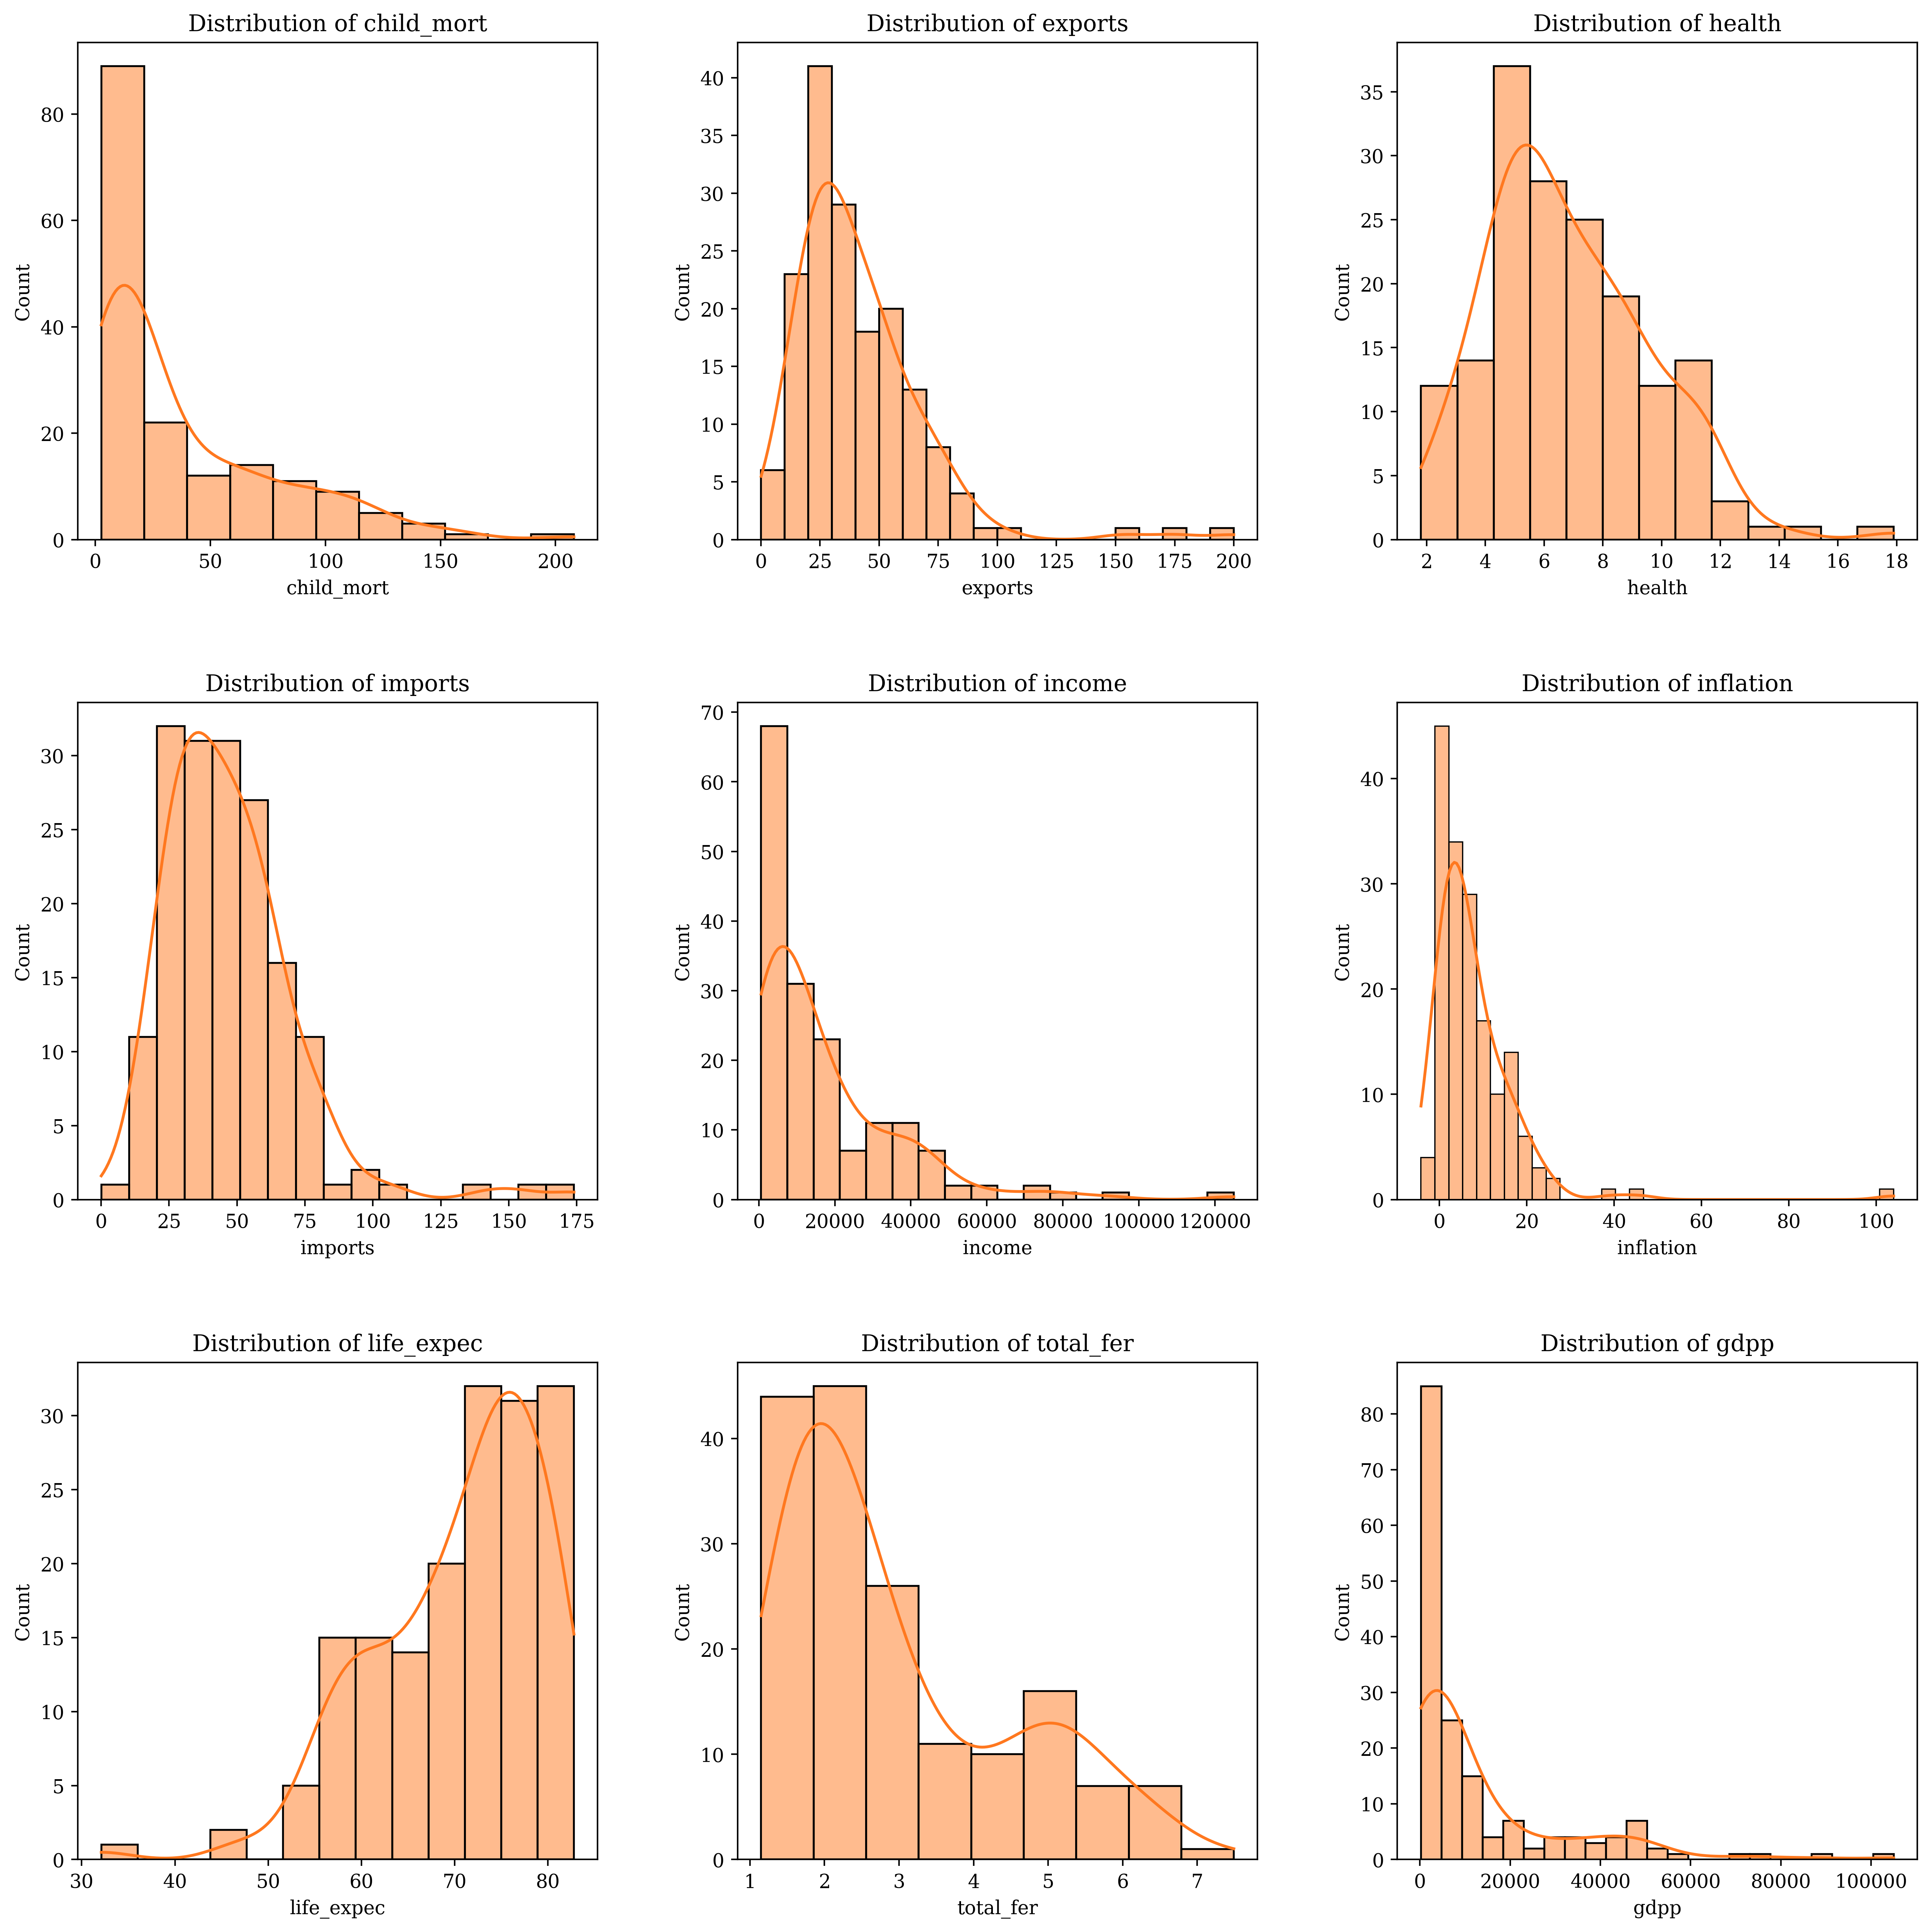

time: 2.5 s (started: 2024-07-18 16:05:49 +09:00)


In [20]:
colors = ['#FF781F', '#2D2926']

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_features)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], color=colors[0], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
fig.tight_layout(pad=4)
plt.show()

In [21]:
len(data['country'].unique()) == len(data)

True

time: 0 ns (started: 2024-07-18 16:06:25 +09:00)


- **life_expec** displays a **left ornegatively skewed data distribution**.
- **health** displays a **normally distributed data**.
- All the remaining features show a **right or positively skewd data distribution**.
- Data distribution of **country** is not put out as it has text data and it has the same number of unique values as the length of thd dataframe.

**Features of Economically Backward Countries** :

- The country's **per capita income is very low**.
- **High Population** that leads to non-availability of resources.
- **Unemployment** due to less resources.
- **Low country wealth** that leads to **low capital**.
- **Inequitable** distribution of **wealth** and **income**.
- **Lack of proper educational amenities** and thus **illiteracy prevails**.
- **Low level of living**.
- **No technical advancement**.
- **Poor health services** coupled with **high birth & death rates**.

**country vs Numerical Features** :

child_mort: Economically backward nations have a high infant mortality rate!

In [51]:
def plot_top_bottom_categories(data: pd.DataFrame, target: str, metric_name: str):
    """
    Plots bar charts for the top, median, and bottom categories of a specified metric.

    Parameters:
    - data (pd.DataFrame): The input data containing the categories and the target metric.
    - target (str): The column name of the target metric.
    - metric_name (str): The name of the metric to be used in the plot titles and labels.
    """
    # Colors for the bar plots
    colors = ['#FF781F', '#2D2926']
    
    # Categories
    categories = ['High', 'Median', 'Low']
    
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
    
    # Index ranges for the different categories
    index_ranges = [slice(0, 5), slice(81, 86), slice(161, 166)]
    
    # Plot each category
    for i, (ax, index_range) in enumerate(zip(axes, index_ranges)):
        sorted_data = data.sort_values(by=target, ascending=False).iloc[index_range]
        sns.barplot(x='country', y=target, data=sorted_data, palette=colors, edgecolor='black', ax=ax)
        ax.set_title(f'Countries with {categories[i]} {metric_name}')
        ax.set_xlabel('')  # Remove the x-axis label
        ax.set_ylabel(f'{target}' if i == 0 else '')  # Only the first plot has the y-axis label
        
        # Add annotations to the bars
        for rect in ax.patches:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=12)
    
    fig.tight_layout(pad=4)
    plt.show()

time: 0 ns (started: 2024-07-18 21:04:46 +09:00)


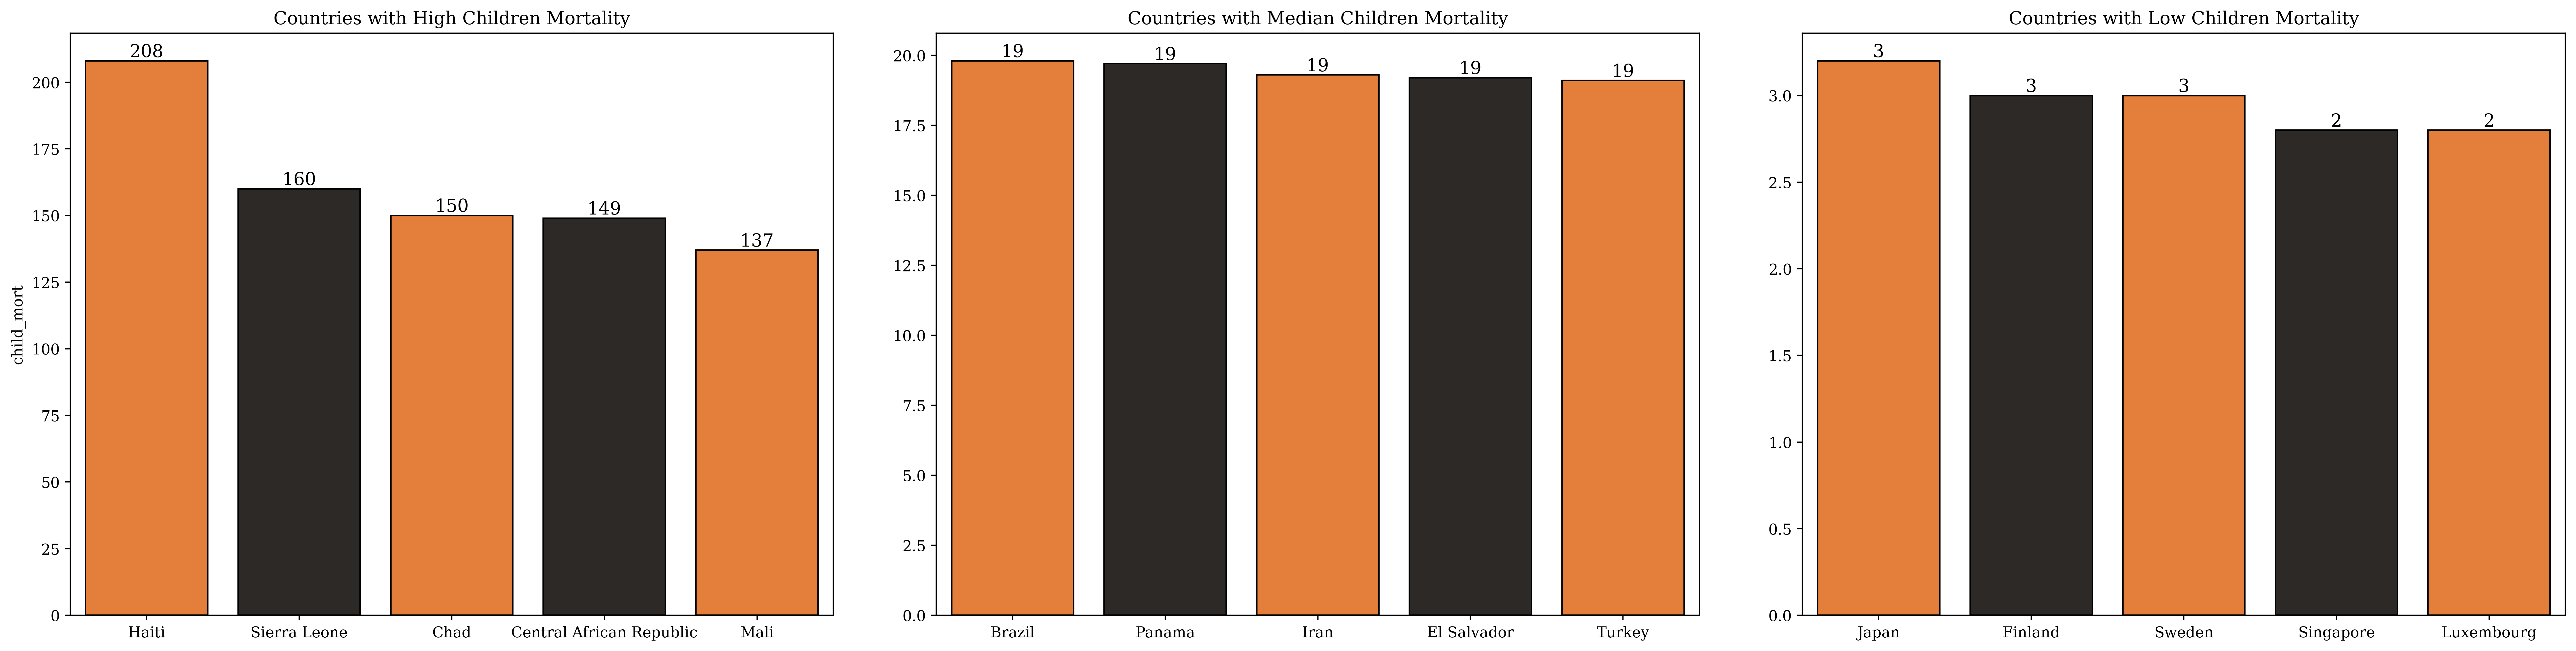

time: 1.33 s (started: 2024-07-18 21:04:48 +09:00)


In [52]:
plot_top_bottom_categories(data, 'child_mort', 'Children Mortality')

- **Haiti** has the highest children's deaths. **African countries** have significant positions is this statistic.
- At the other extreme of **child_mort**, countries from **Asia and Europe** has some solid presence.

**exports: It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!**

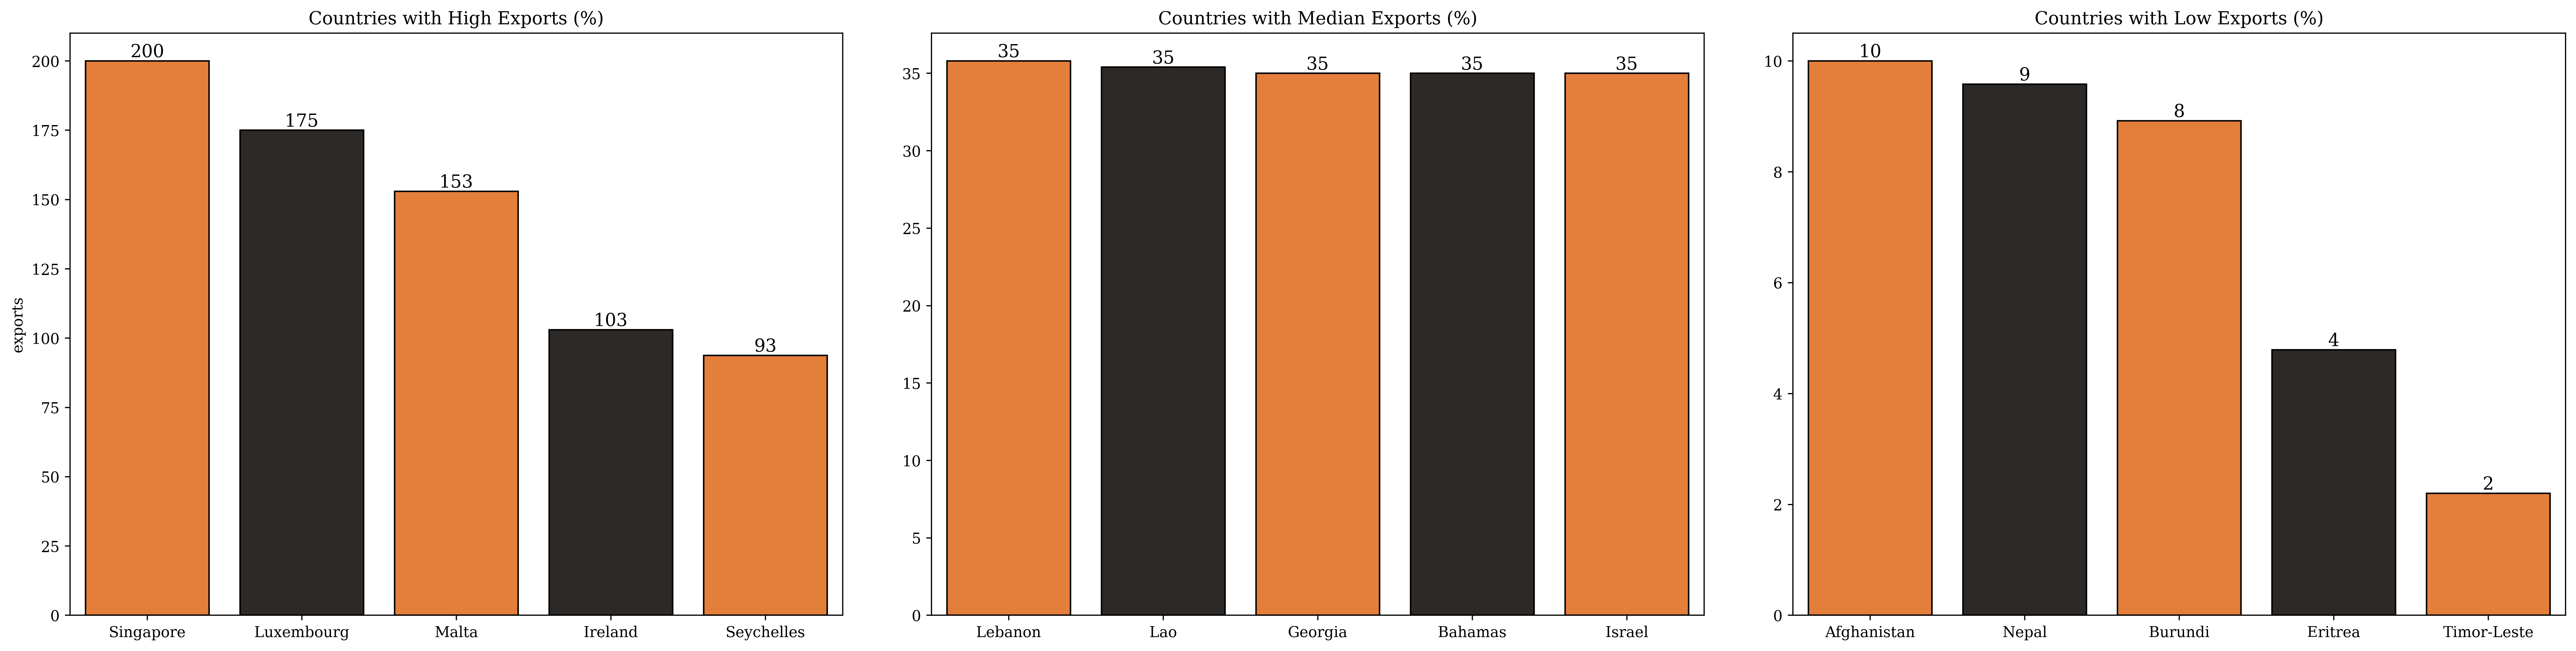

time: 1.34 s (started: 2024-07-18 21:04:51 +09:00)


In [53]:
plot_top_bottom_categories(data, 'exports', 'Exports (%)')

- **exports** of a nation are usually goods and services created domestically but sold to other nations. Goods and services exported depends on factors like the geographical location, natural resources, population size & their preference towards specific skills, etc.
- Despite **Singapore's** population size not being in the top 100, they have the highest number of **exports**. **Luxembourg** & **Malta** have probably followed the same route.
- **Afghanistan** & **Nepal** are present in the lower end of **exports**. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

**health: Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!**

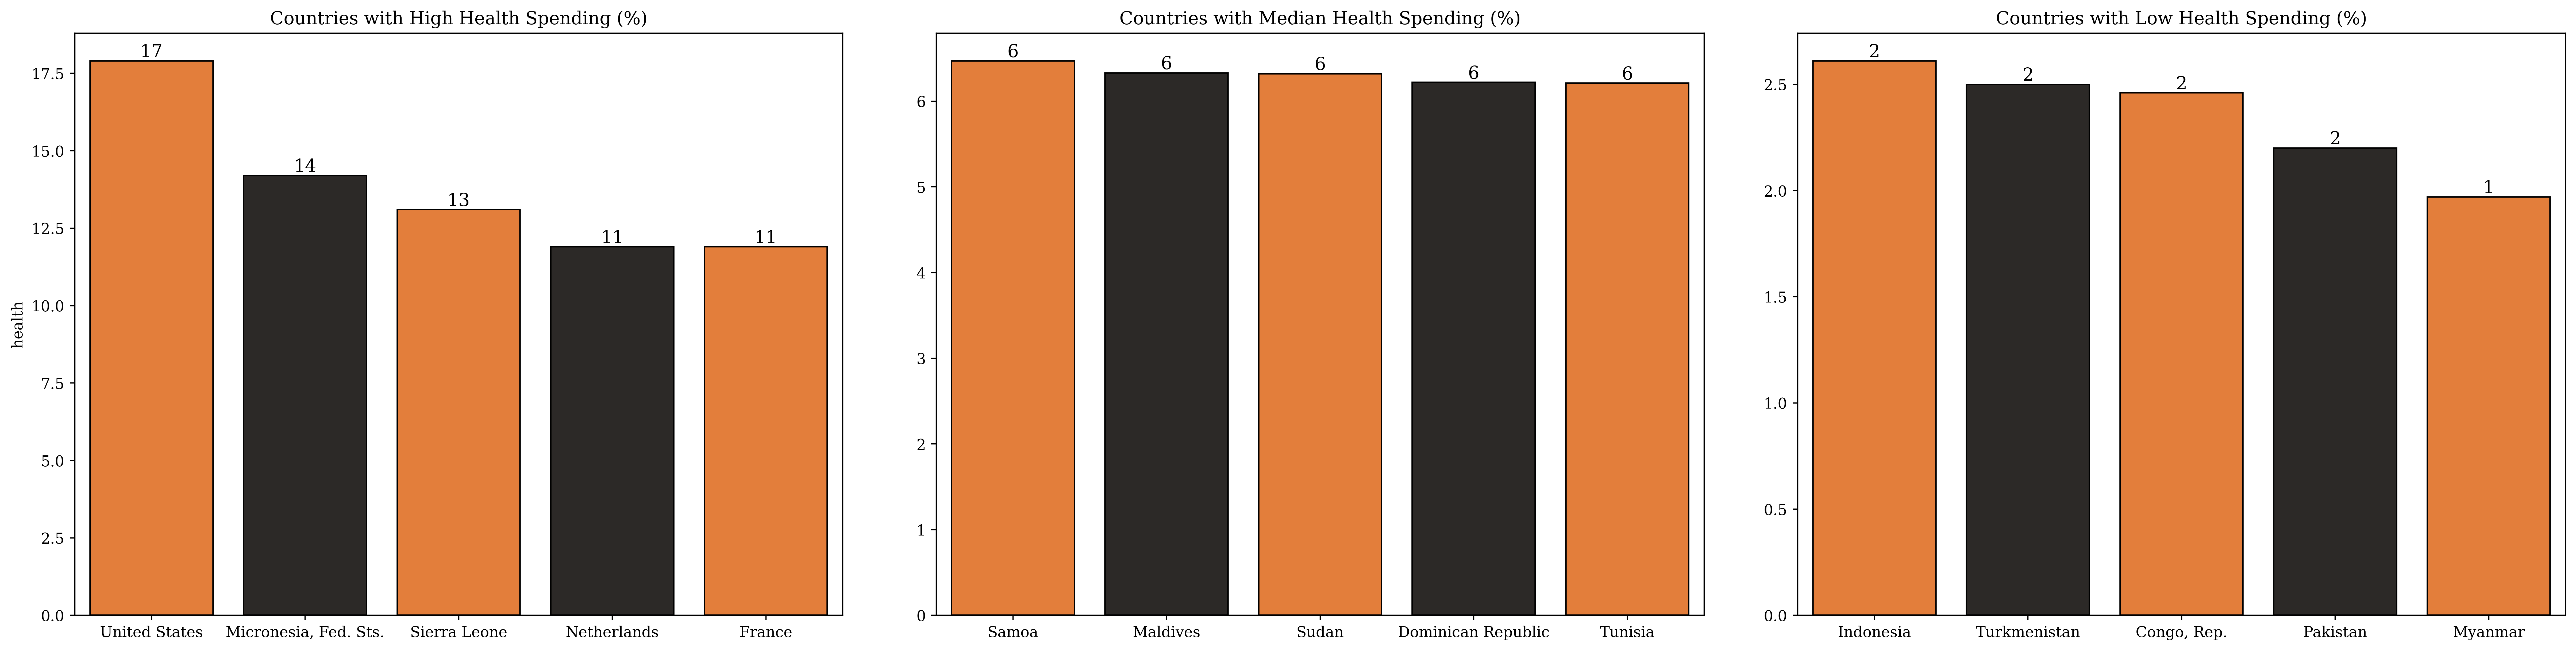

time: 1.33 s (started: 2024-07-18 21:04:55 +09:00)


In [54]:
plot_top_bottom_categories(data, 'health', 'Health Spending (%)')

- **US** stands at the top when it comes to spending on health with **17%** of the individual GDP contribution.
- **6%** seems to be the mean values of the citizens spending on their **health**.
- **Asian** countries dominate the lower end of **health** with less than **3%**. They are the most ignorant citizens when it comes to health.

**imports: It is another attribute that determines the reliance of the nations on other nations for the goods and services!**

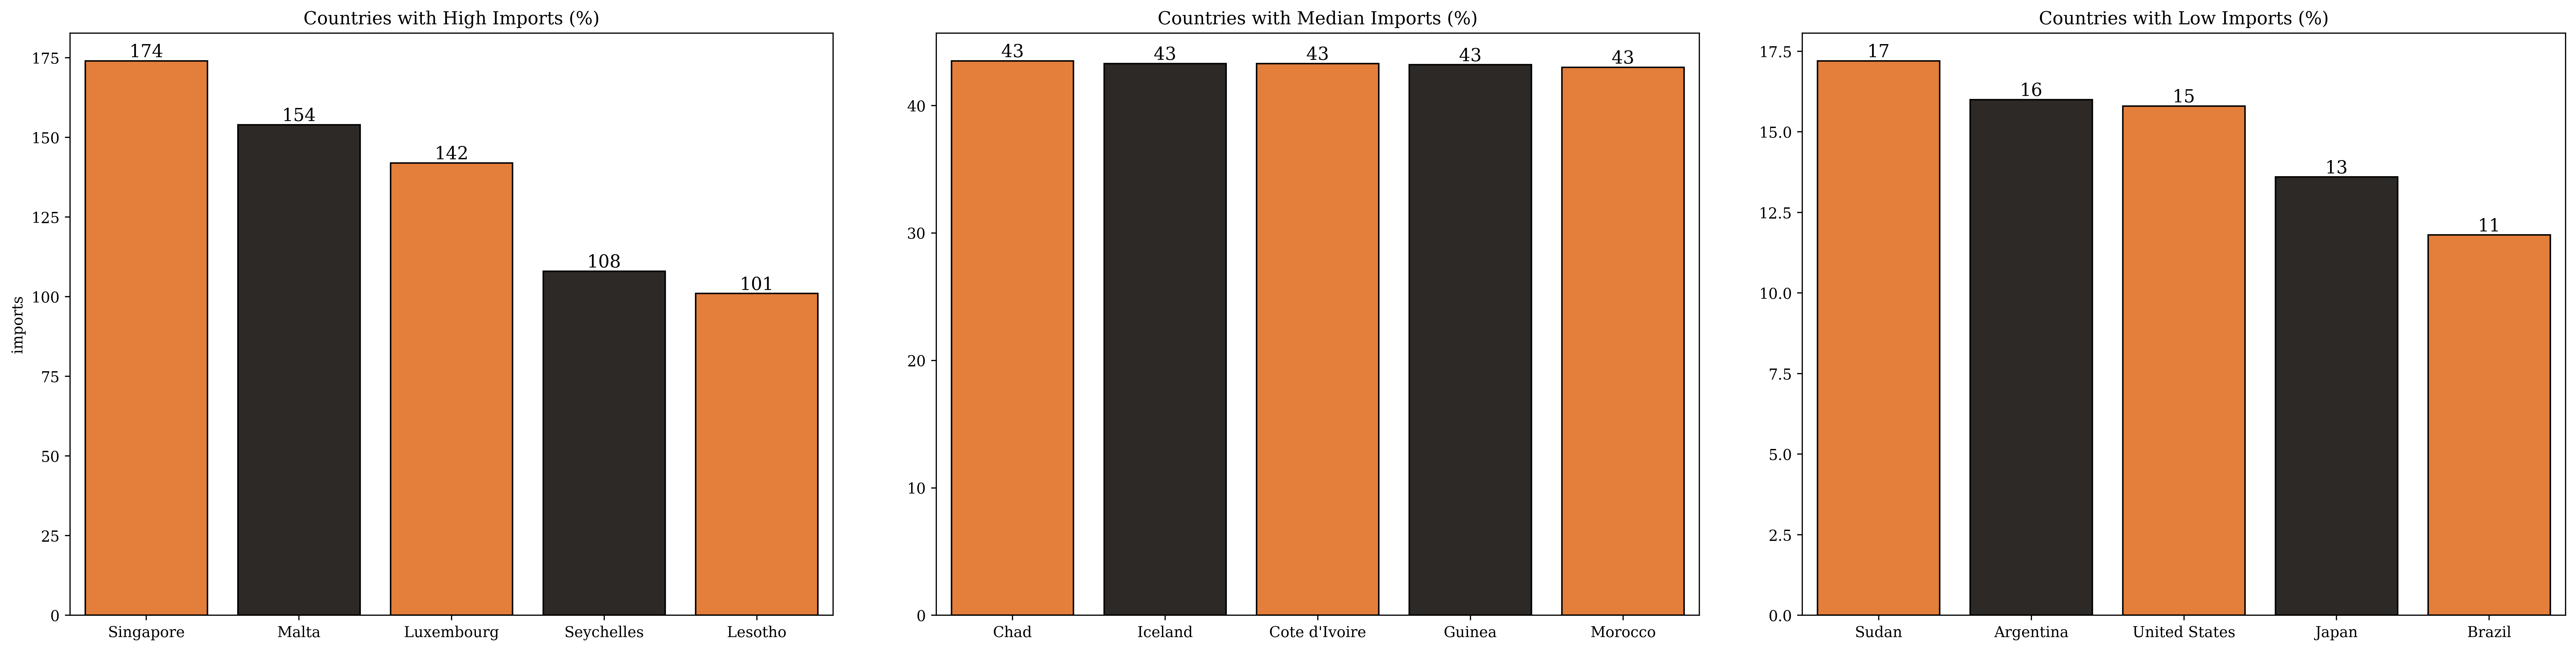

time: 1.33 s (started: 2024-07-18 21:07:48 +09:00)


In [55]:
plot_top_bottom_categories(data, 'imports', 'Imports (%)')

- **imports** stats of a nation describe the self reliance of a nation to solve their problems irrespective of being handicapped on one of the essential resources.
- **Singapore**, **Malta**, **Luxembourg** & **Seychelles** are present in the top 5 of **exports** as well as **imports**. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid **exports** that gets countered by the heavy **imports** on something else. This just balances the books!
- **Brazil** has the lowest **imports** out of all the nations with **11%**. **Sudan** is the only African country present in this lower end list with **17%**.

**income: Income of the per person is a key indicator about country's ecnonomic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!**

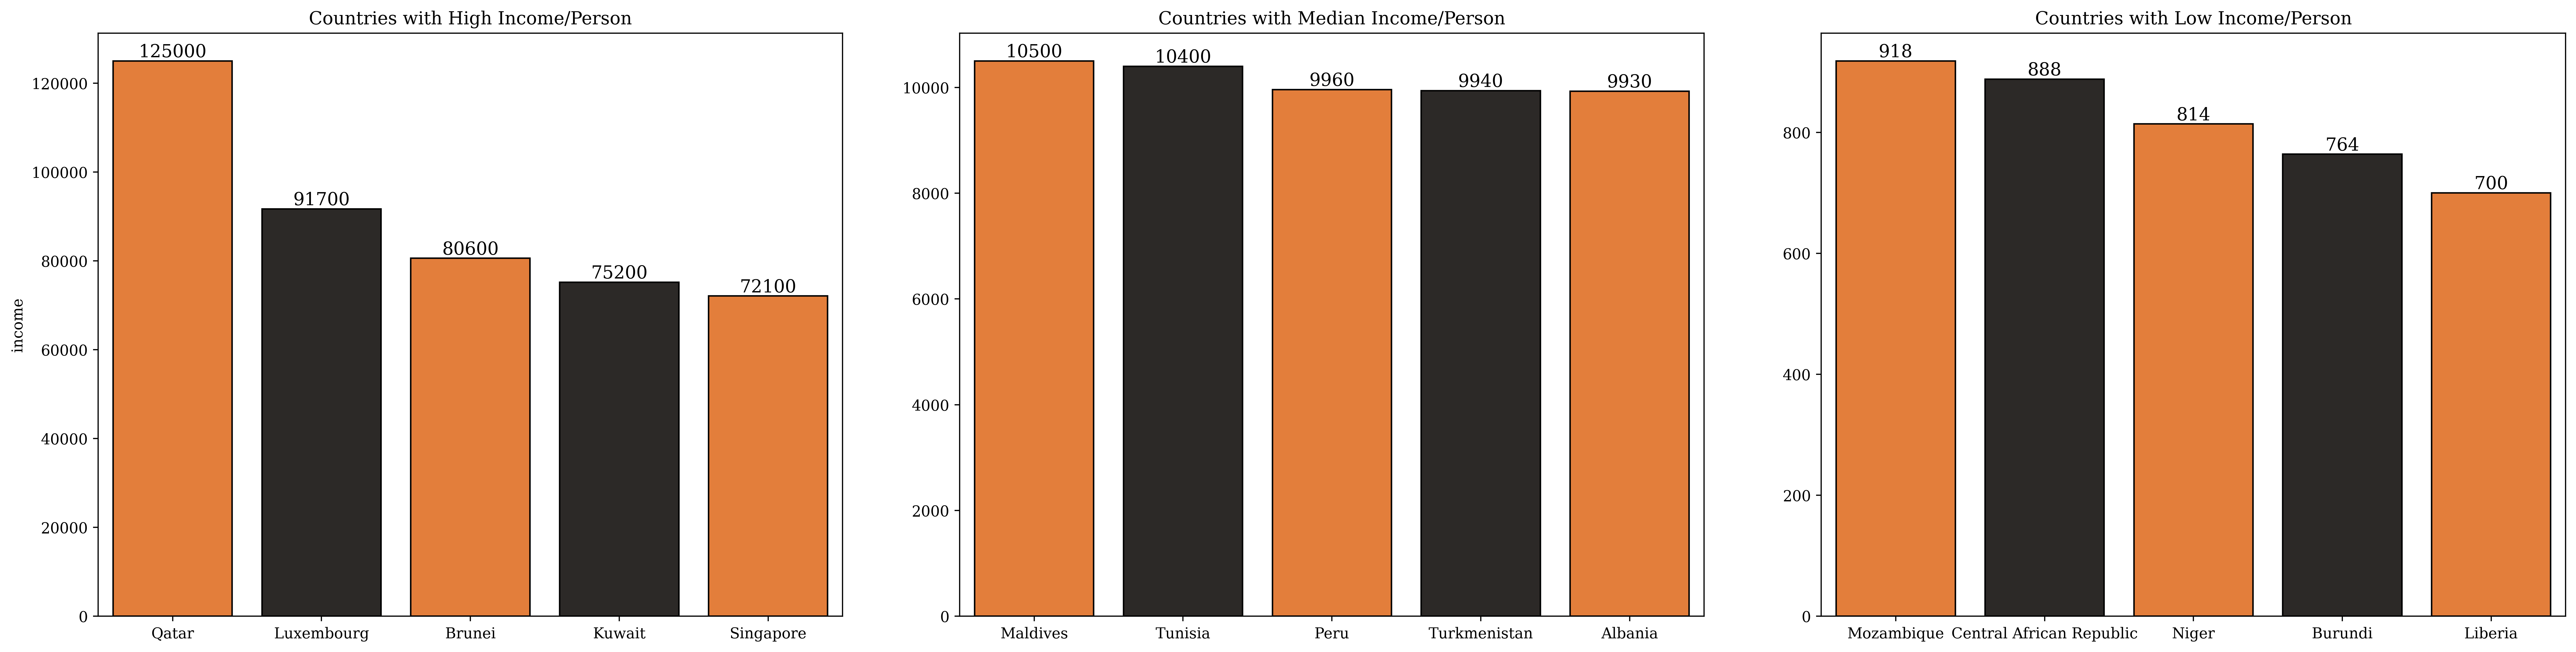

time: 1.56 s (started: 2024-07-18 21:13:39 +09:00)


In [56]:
plot_top_bottom_categories(data, 'income', 'Income/Person')

- Citizens of the **Qatar** have the highest **income** out of all the countries with a difference of **30k** more than the 2nd placed countries. 
- **Singapore** & **Luxembourg** are again present in the top 5 of another feature.
- Lower end of the **income** is dominated by the **African** nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered.
- The difference in the **income** of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

**inflation: It dicates the state of the ecnomoy, strength of the currency as well as demand for goods & services!**

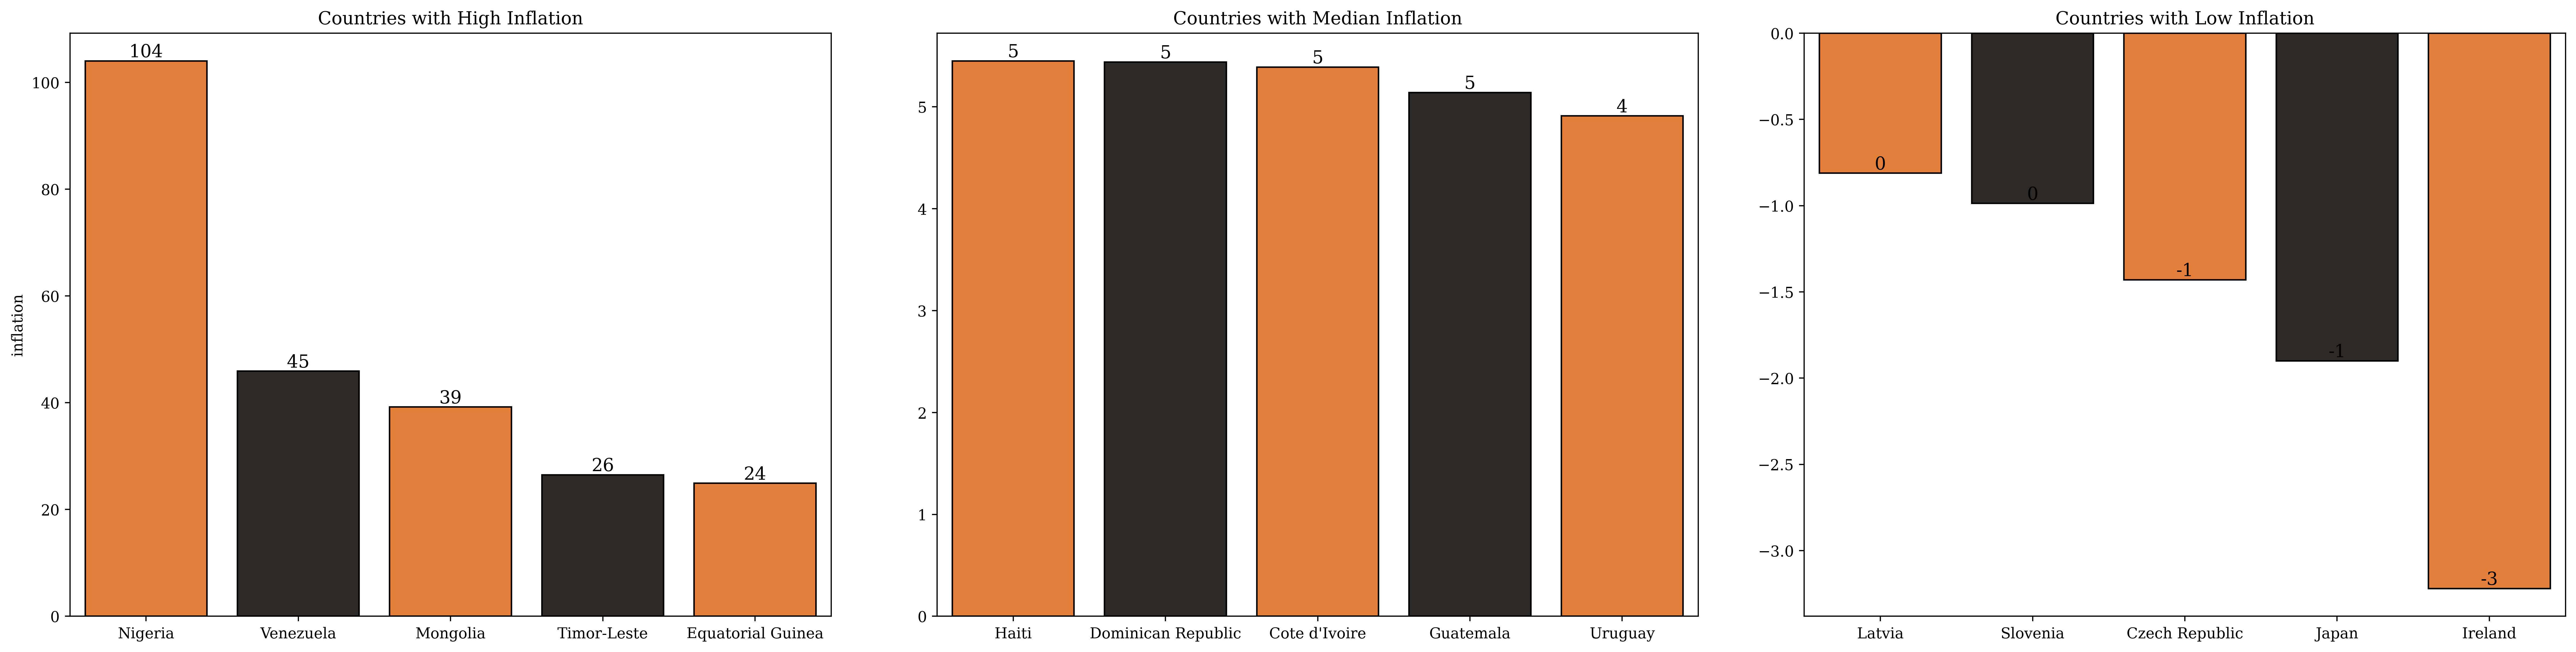

time: 1.45 s (started: 2024-07-18 21:22:58 +09:00)


In [57]:
plot_top_bottom_categories(data, 'inflation', 'Inflation')